In [1]:
import numpy
import pandas
from scipy.interpolate import bisplrep, bisplev
from scipy.interpolate import Rbf
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from shapely.geometry.polygon import Polygon

In [2]:
df = pandas.read_csv("test.csv")

In [3]:
ox_vec = df["x_position"].values
oy_vec = df["y_position"].values
z_vec = df["z_position"].values
r_vec = df["r_record"].values
g_vec = df["g_record"].values
b_vec = df["b_record"].values

In [4]:
theta = -0.0080557346
centroid = numpy.array(Polygon(
    [(13095791.56045845, 440197.4105165757), 
     (13095798.558713403, 440197.46689475345), 
     (13095798.597926587, 440192.5993421183), 
     (13095791.599671638, 440192.5429638893), 
     (13095791.56045845, 440197.4105165757)]).centroid.coords).T

xy = numpy.stack([ox_vec, oy_vec])

# get sin(theta), cos(theta)
sin_theta = numpy.sin(theta)
cos_theta = numpy.cos(theta)

# construct rotation matrix
R = numpy.array([[cos_theta, -sin_theta],
                 [sin_theta,  cos_theta]])

xy_prime = R @ (xy - centroid)
x_vec = xy_prime[0]
y_vec = xy_prime[1]

In [5]:
xcomp = numpy.linspace(-3, 3, 53)
ycomp = numpy.linspace(-2.44, 2.44, 37)

mesh = numpy.meshgrid(xcomp, ycomp)
xmesh = mesh[0].flatten()
ymesh = mesh[1].flatten()

In [6]:
# model for height
ztck = bisplrep(x_vec, y_vec, z_vec, kx=1, ky=1, s=40)
z_pred = bisplev(xcomp, ycomp, ztck)

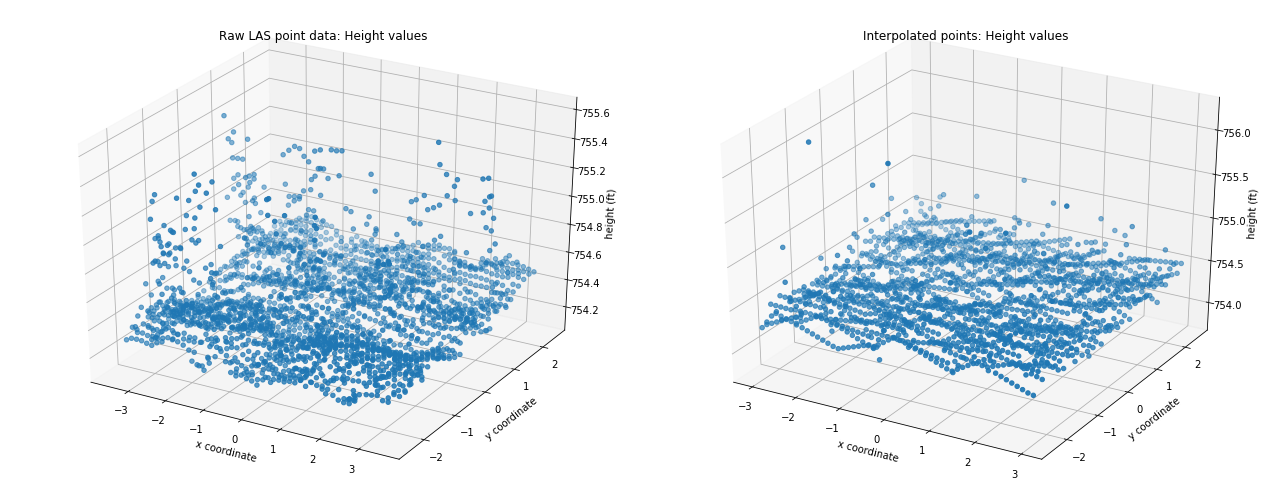

In [7]:
fig = pyplot.figure(figsize=(18,7))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_vec, y_vec, z_vec)
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_zlabel("height (ft)")
ax.set_title("Raw LAS point data: Height values")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(xmesh, ymesh, z_pred.flatten())
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_zlabel("height (ft)")
ax.set_title("Interpolated points: Height values")

pyplot.tight_layout()

pyplot.savefig("height_3d.png", dpi = 400)

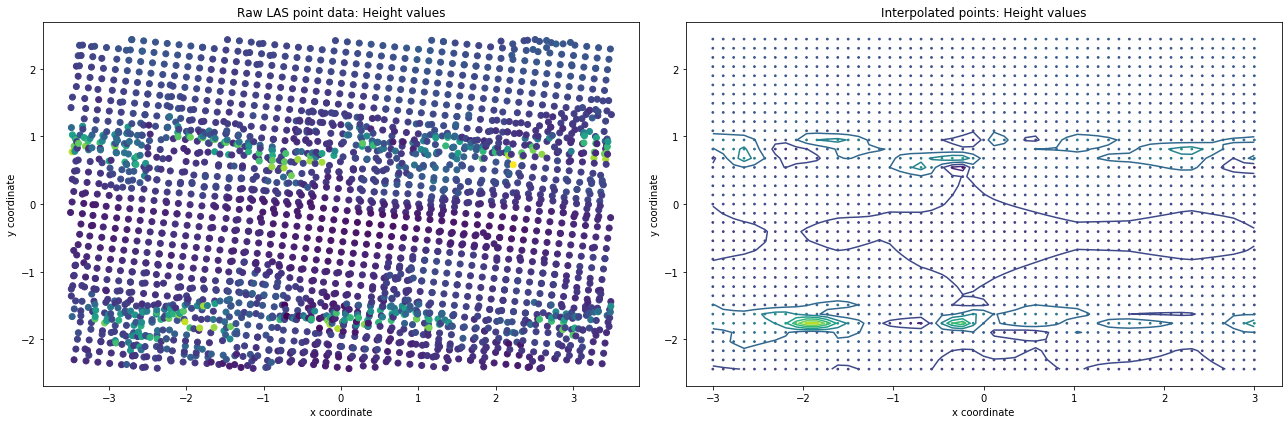

In [8]:
fig = pyplot.figure(figsize=(18,6))

ax = fig.add_subplot(121)
ax.scatter(x_vec, y_vec, c=z_vec)
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_title("Raw LAS point data: Height values")

ax = fig.add_subplot(122)
ax.scatter(xmesh.flatten(), ymesh.flatten(), s =3, c=z_pred.T.flatten())
ax.contour(xcomp, ycomp, z_pred.T)
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_title("Interpolated points: Height values")

pyplot.tight_layout()

pyplot.savefig("height_2d.png", dpi = 400)

In [9]:
# model for RGB
rtck = bisplrep(x_vec, y_vec, r_vec, kx=1, ky=1, s=40)
gtck = bisplrep(x_vec, y_vec, g_vec, kx=1, ky=1, s=40)
btck = bisplrep(x_vec, y_vec, b_vec, kx=1, ky=1, s=40)

r_pred = bisplev(xcomp, ycomp, rtck)
g_pred = bisplev(xcomp, ycomp, gtck)
b_pred = bisplev(xcomp, ycomp, btck)

# restrict ranges
for v in [r_pred, g_pred, b_pred]:
    v[v > 65535] = 65535
    v[v < 0] = 0

# predict and stack matrix
rgb = numpy.stack([r_pred, g_pred, b_pred])
rgb = numpy.round(rgb/256).transpose(2,1,0).astype('uint8')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:976: RuntimeWarning: The required storage space exceeds the available storage space.
Probable causes: nxest or nyest too small or s is too small. (fp>s)
	kx,ky=1,1 nx,ny=36,36 m=2510 fp=21152854918.279305 s=40.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:976: RuntimeWarning: The required storage space exceeds the available storage space.
Probable causes: nxest or nyest too small or s is too small. (fp>s)
	kx,ky=1,1 nx,ny=36,36 m=2510 fp=18493016172.690365 s=40.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:976: RuntimeWarning: The required storage space exceeds the available storage space.
Probable causes: nxest or nyest too small or s is too small. (fp>s)
	kx,ky=1,1 nx,ny=36,36 m=2510 fp=20912572132.943680 s=40.00

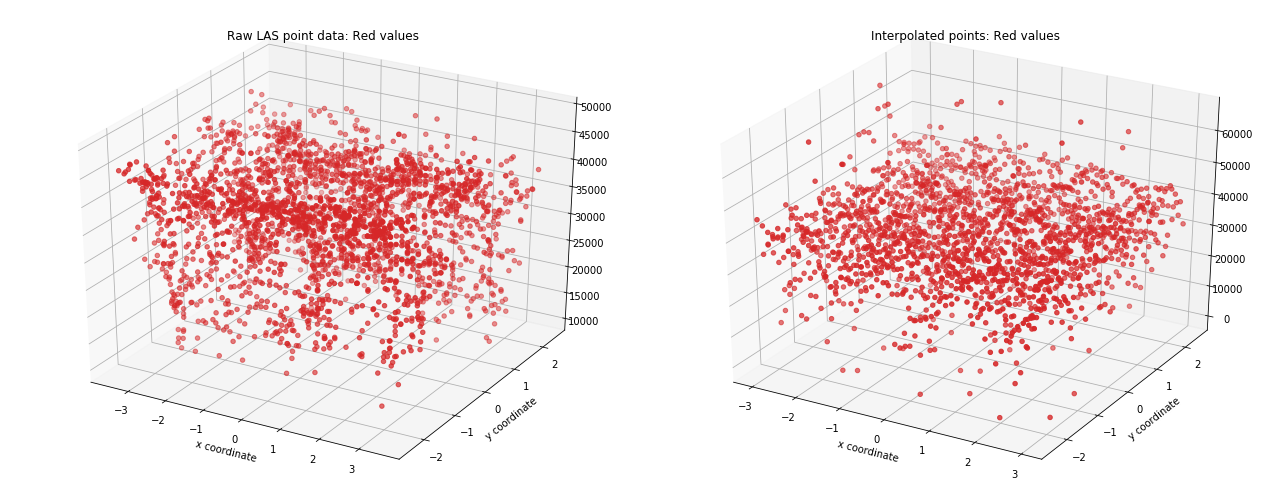

In [10]:
fig = pyplot.figure(figsize=(18,7))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_vec, y_vec, r_vec, c = "tab:red")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_title("Raw LAS point data: Red values")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(xmesh, ymesh, r_pred, c = "tab:red")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_title("Interpolated points: Red values")

pyplot.tight_layout()

pyplot.savefig("red_3d.png", dpi = 400)

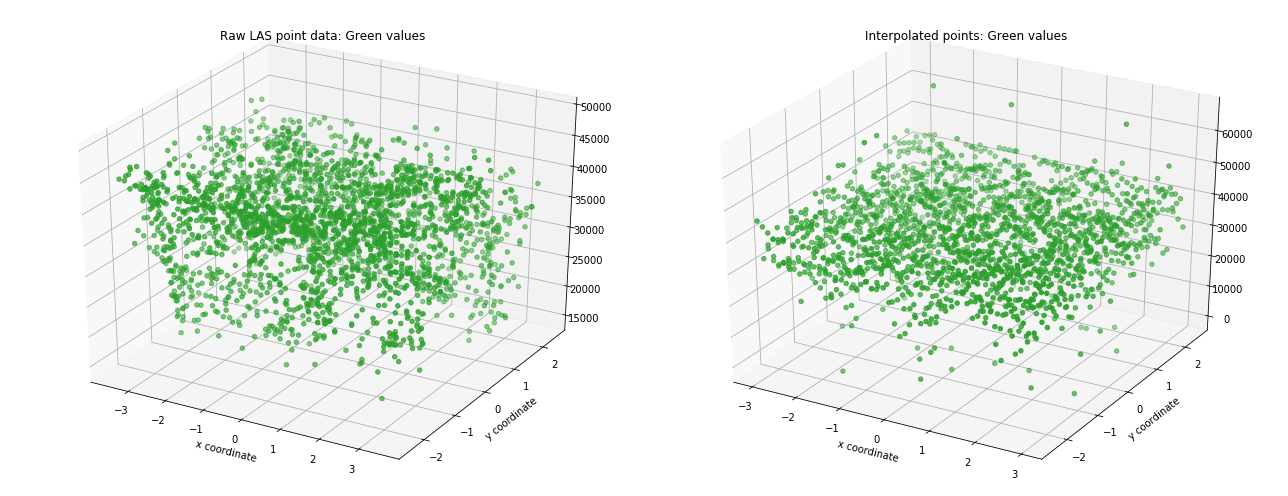

In [11]:
fig = pyplot.figure(figsize=(18,7))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_vec, y_vec, g_vec, c = "tab:green")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_title("Raw LAS point data: Green values")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(xmesh, ymesh, g_pred, c = "tab:green")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_title("Interpolated points: Green values")

pyplot.tight_layout()

pyplot.savefig("green_3d.png", dpi = 400)

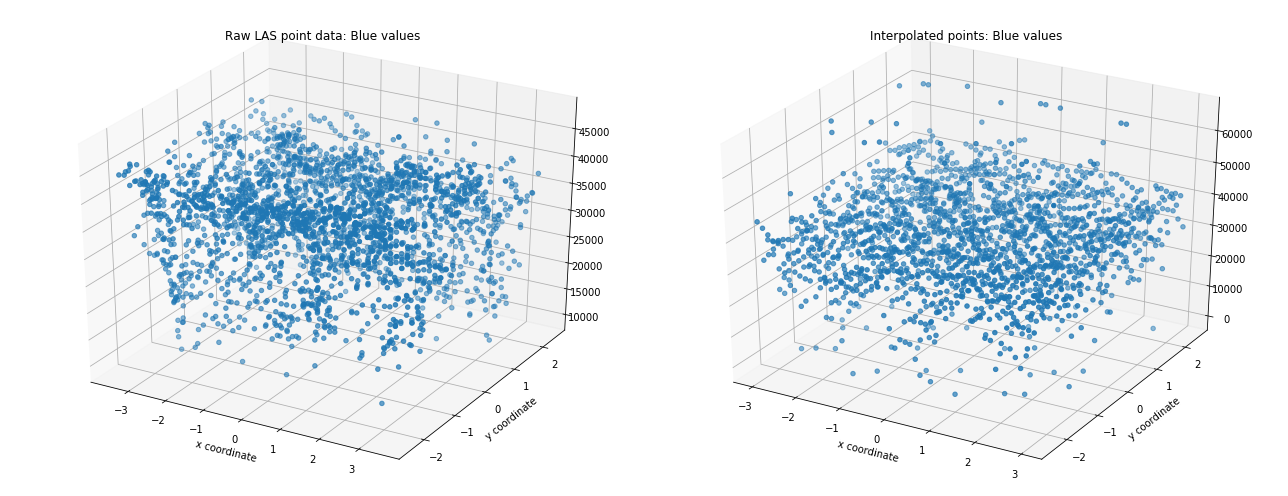

In [12]:
fig = pyplot.figure(figsize=(18,7))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_vec, y_vec, b_vec, c = "tab:blue")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_title("Raw LAS point data: Blue values")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(xmesh, ymesh, b_pred, c = "tab:blue")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_title("Interpolated points: Blue values")

pyplot.tight_layout()

pyplot.savefig("blue_3d.png", dpi = 400)

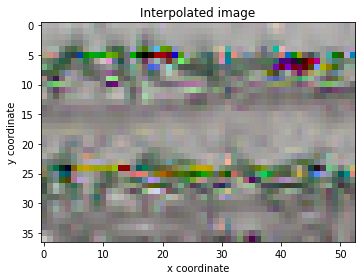

In [13]:
# show constructed image
pyplot.imshow(rgb)
pyplot.xlabel("x coordinate")
pyplot.ylabel("y coordinate")
pyplot.title("Interpolated image")
pyplot.tight_layout()

pyplot.savefig("reconstructed.png", dpi = 400)

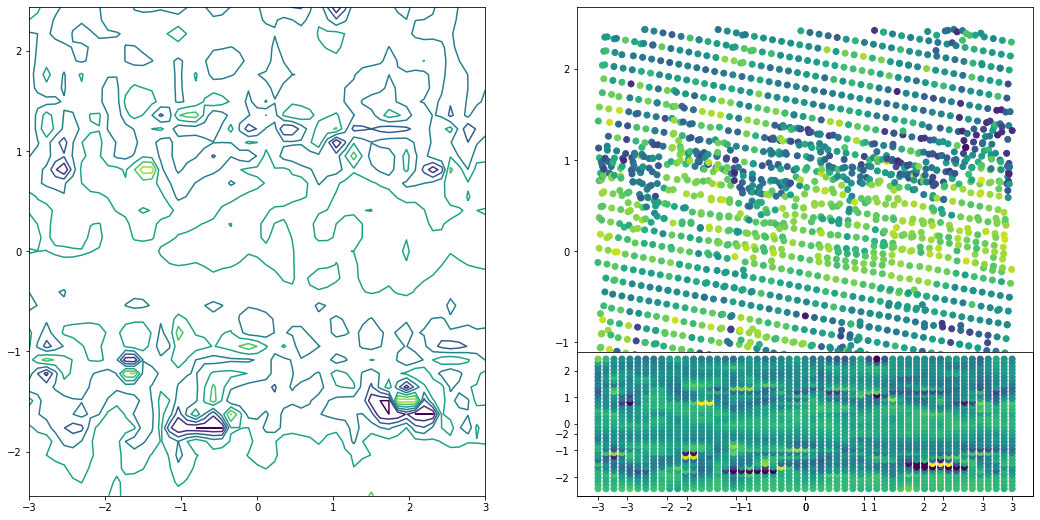

In [14]:
fig = pyplot.figure(figsize=(18,9))

ax = fig.add_subplot(121)
ax.contour(xcomp, ycomp, g_pred.T)

ax = fig.add_subplot(122)
ax.scatter(x_vec, y_vec, c=g_vec)

ax = fig.add_subplot(326)
ax.scatter(xmesh.flatten(), ymesh.flatten(), c=g_pred.T.flatten())

In [15]:
tck = bisplrep(x_vec, y_vec, g_vec, kx=1, ky=1, s=40)
g_pred = bisplev(xcomp, ycomp, tck)
g_pred[g_pred > 65535] = 65535
g_pred[g_pred < 0] = 0

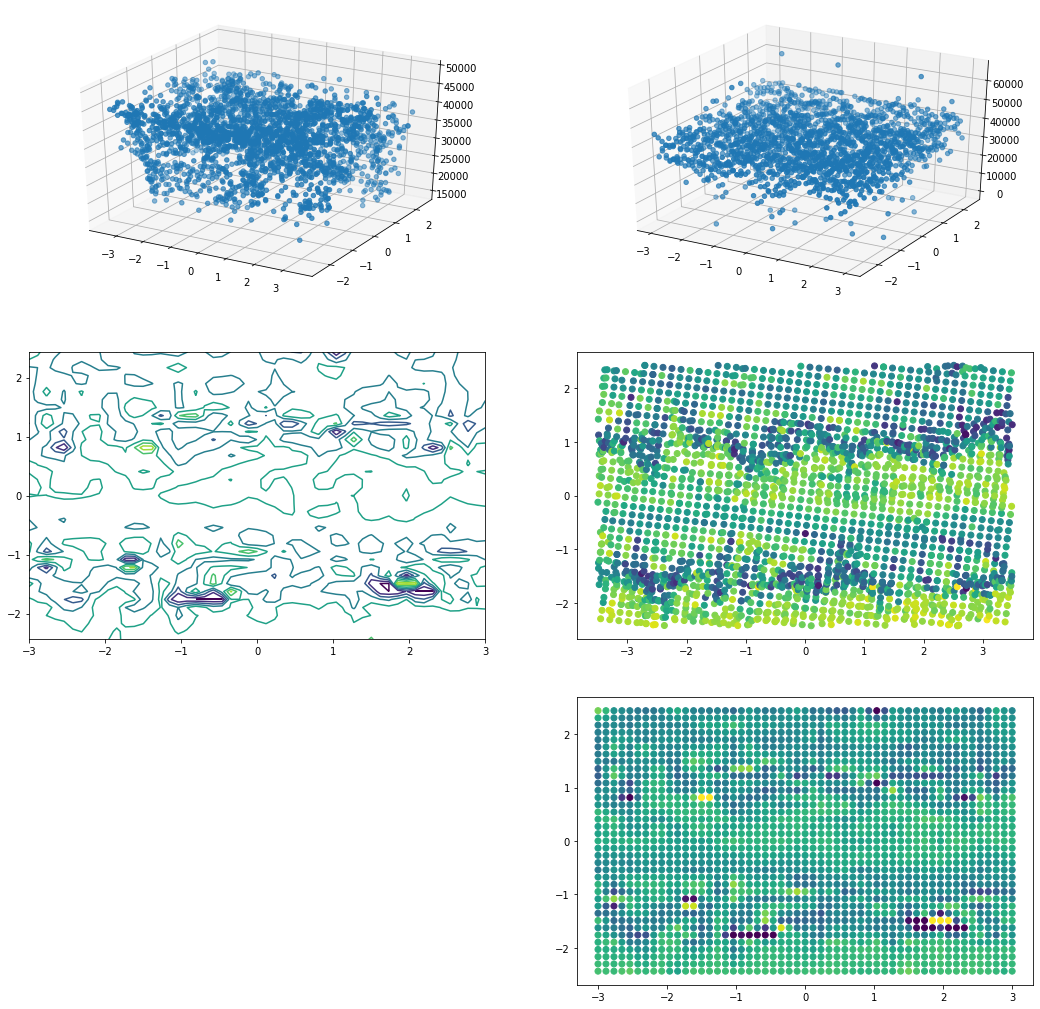

In [16]:
fig = pyplot.figure(figsize=(18,18))

ax = fig.add_subplot(321, projection='3d')
ax.scatter(x_vec, y_vec, g_vec)

ax = fig.add_subplot(322, projection='3d')
ax.scatter(xmesh, ymesh, g_pred)

ax = fig.add_subplot(323)
ax.contour(xcomp, ycomp, g_pred.T)

ax = fig.add_subplot(324)
ax.scatter(x_vec, y_vec, c=g_vec)

ax = fig.add_subplot(326)
ax.scatter(xmesh.flatten(), ymesh.flatten(), c=g_pred.T.flatten())

In [17]:
kx = 1
ky = 1
s = 40
# make image
rtck = bisplrep(x_vec, y_vec, r_vec, kx=kx, ky=ky, s=s)
gtck = bisplrep(x_vec, y_vec, g_vec, kx=kx, ky=ky, s=s)
btck = bisplrep(x_vec, y_vec, b_vec, kx=kx, ky=ky, s=s)

# predictions
r_pred = bisplev(xcomp, ycomp, rtck)
g_pred = bisplev(xcomp, ycomp, gtck)
b_pred = bisplev(xcomp, ycomp, btck)

# predict and stack matrix
rgb = numpy.stack([r_pred, g_pred, b_pred])
rgb[rgb > 65535] = 65535
rgb[rgb < 0] = 0

rgb = numpy.round(rgb/256).transpose(2,1,0).astype('uint8')

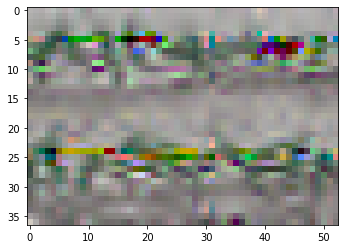

In [18]:
pyplot.imshow(rgb)

In [19]:
natcol = pandas.read_csv("MSU_2019_07_02_NatCol_obs_plots.csv.gz")

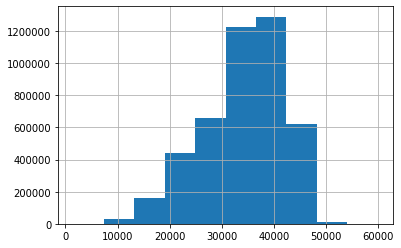

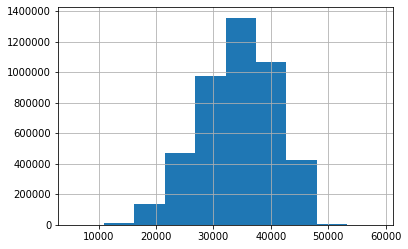

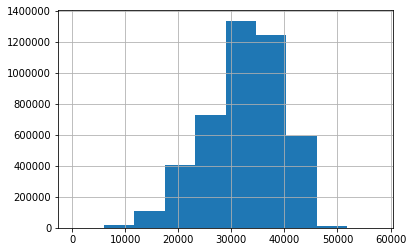

In [28]:
pyplot.figure(1)
natcol["r_record"].hist()
pyplot.figure(2)
natcol["g_record"].hist()
pyplot.figure(3)
natcol["b_record"].hist()

In [24]:
natcol2 = pandas.read_csv("MSU_2019_09_02_NatCol_obs_plots.csv.gz")

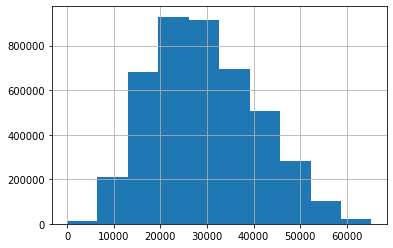

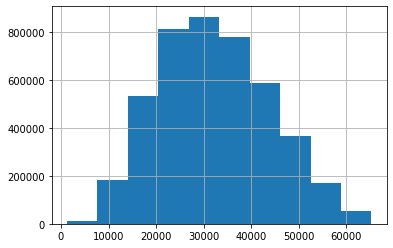

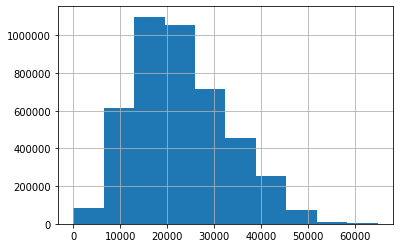

In [27]:
pyplot.figure(1)
natcol2["r_record"].hist()
pyplot.figure(2)
natcol2["g_record"].hist()
pyplot.figure(3)
natcol2["b_record"].hist()